# Esercizio: classificazione del set di dati CIFAR 10

CIFAR 10 è un insieme di 60.000 immagini 32x32 a colori, di cui 50.000 per l'addestramento e 10.000 per il test. Ogni immagine può appartenere ad una di 10 possibili categorie: 

* 0 	airplane
* 1 	automobile
* 2 	bird
* 3 	cat
* 4 	deer
* 5 	dog
* 6 	frog
* 7 	horse
* 8 	ship
* 9 	truck

## Preparazione dati

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# Caricamento dell'insieme di dati.

(cifar_train_images, cifar_train_labels), (cifar_test_images, cifar_test_labels) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [5]:
# cifar_train_images è un array a 4 dimensioni. L'ultima dimensione è il canale colore (Red, Green e Blue)

cifar_train_images.shape

(50000, 32, 32, 3)

In [6]:
cifar_train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
cifar_train_images_ok = cifar_train_images / 255.0
cifar_test_images_ok = cifar_test_images / 255.0

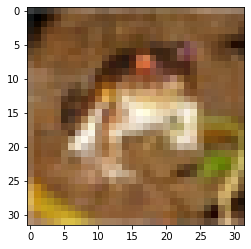

In [8]:
plt.imshow(cifar_train_images_ok[0])

In [9]:
# cifar_train_labels contiene le etichette numeriche delle singole immagini.
# Ad esempio l'etichetta dell'immagine 0 è 6 (frog). Non è particolarmente
# importante, ma in realtà ogni elemento di cifar_train_labels non è un valore
# da 0 a 9, ma un vettore con un solo elemento, che è il valore da 0 a 9 cercato.

cifar_train_labels[0]

array([6], dtype=uint8)

In [10]:
# One Hot Ecoding delle etichette

cifar_train_labels_ok = tf.keras.utils.to_categorical(cifar_train_labels)
cifar_test_labels_ok = tf.keras.utils.to_categorical(cifar_test_labels)

cifar_train_labels_ok[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [11]:
# Creiamo anche un vettore di nomi per poter facilmente associare l'etichetta
# numerica al corrispondente significato

cifar_class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

cifar_class_names[cifar_train_labels[0, 0]]

'frog'

## Rete neurale

In [12]:
# Possibile soluzione. Notare che, nonostante il numero molto alto di strati intermedi
# (e la conseguenza lentezza nell'addestramento) le prestazioni della rete sono molto
# inferiori a quelle che si sono ottenute con MNIST.

# ATTENZIONE: esistono metodi migliori che vedremo nei prossimi seminari

network_cifar = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
network_cifar.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [13]:
network_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cifar = network_cifar.fit(cifar_train_images_ok, cifar_train_labels_ok, epochs=30, batch_size=128)

Epoch 1/30
391/391 [==============================] - 5s 6ms/step - loss: 1.8645 - accuracy: 0.3302
Epoch 2/30
391/391 [==============================] - 2s 6ms/step - loss: 1.6604 - accuracy: 0.4051
Epoch 3/30
391/391 [==============================] - 2s 6ms/step - loss: 1.5669 - accuracy: 0.4398
Epoch 4/30
391/391 [==============================] - 2s 6ms/step - loss: 1.5182 - accuracy: 0.4584
Epoch 5/30
391/391 [==============================] - 2s 6ms/step - loss: 1.4688 - accuracy: 0.4778
Epoch 6/30
391/391 [==============================] - 2s 6ms/step - loss: 1.4385 - accuracy: 0.4861
Epoch 7/30
391/391 [==============================] - 2s 6ms/step - loss: 1.4029 - accuracy: 0.5008
Epoch 8/30
391/391 [==============================] - 2s 6ms/step - loss: 1.3783 - accuracy: 0.5090
Epoch 9/30
391/391 [==============================] - 2s 6ms/step - loss: 1.3523 - accuracy: 0.5188
Epoch 10/30
391/391 [==============================] - 2s 6ms/step - loss: 1.3228 - accuracy: 0.5281

In [14]:
# La situazione è ancora peggiore se guardiamo all'accuratezza sull'insieme di test, che è circa
# del 50%. Siamo in una situazione con un notevole overfitting.

network_cifar.evaluate(cifar_test_images_ok, cifar_test_labels_ok)

313/313 [==============================] - 1s 3ms/step - loss: 1.4447 - accuracy: 0.5225


[1.4447178840637207, 0.5224999785423279]

In [15]:
# Questo è l'elenco delle immagini (dell'insieme di addestramento) per cui la rete sbaglia

cifar_predictions = network_cifar.predict(cifar_train_images_ok)
np.where([ np.argmax(x) for x in cifar_predictions] != cifar_train_labels.flatten())

(array([    3,     9,    15, ..., 49994, 49995, 49999]),)

Predizione:  ship
Valore effettivo:  truck


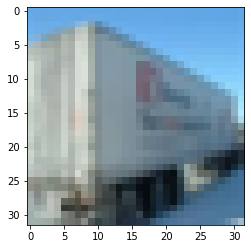

In [16]:
# Controlliamo ad esempio l'immagine 15

print("Predizione: ", cifar_class_names[np.argmax(cifar_predictions[155])])
print("Valore effettivo: ", cifar_class_names[cifar_train_labels[15, 0]])

plt.imshow(cifar_train_images[15])

In [17]:
# Ripetiamo l'addestramento con un insieme di validazione, in modo da controllare
# come evolve l'overfitting nel corso delle epoche. Questa volta lasciamo
# selezionare a TensorFlow i dati da usare per la validazione, aggiungendo il
# parametro validation_split = 0.2, che lo istruisce a utilizzare il 10% dei
# dati per la validazione e il resto per il training.

network_cifar2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
network_cifar2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
network_cifar2.fit(cifar_train_images_ok, cifar_train_labels_ok, epochs=30, batch_size=128, validation_split = 0.1)

Epoch 1/30
352/352 [==============================] - 3s 8ms/step - loss: 1.9154 - accuracy: 0.3144 - val_loss: 1.7768 - val_accuracy: 0.3658
Epoch 2/30
352/352 [==============================] - 2s 7ms/step - loss: 1.6853 - accuracy: 0.3977 - val_loss: 1.6789 - val_accuracy: 0.4084
Epoch 3/30
352/352 [==============================] - 2s 7ms/step - loss: 1.5999 - accuracy: 0.4304 - val_loss: 1.5903 - val_accuracy: 0.4316
Epoch 4/30
352/352 [==============================] - 2s 7ms/step - loss: 1.5478 - accuracy: 0.4484 - val_loss: 1.5835 - val_accuracy: 0.4386
Epoch 5/30
352/352 [==============================] - 2s 6ms/step - loss: 1.4964 - accuracy: 0.4651 - val_loss: 1.5170 - val_accuracy: 0.4552
Epoch 6/30
352/352 [==============================] - 2s 7ms/step - loss: 1.4611 - accuracy: 0.4789 - val_loss: 1.4934 - val_accuracy: 0.4720
Epoch 7/30
352/352 [==============================] - 2s 7ms/step - loss: 1.4298 - accuracy: 0.4895 - val_loss: 1.4717 - val_accuracy: 0.4746
Epoch 